In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
#import joypy
import seaborn as sns
import spacy
import datetime
import os
import json

%matplotlib inline

In [5]:
df08 = pd.read_csv('C:data/Beijing_PM2.5_2008_YTD.csv'
                   ,encoding='utf-8')
df08.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Beijing,PM2.5 - Principal,2008-01-01 01:00 AM,2008,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,Beijing,PM2.5 - Principal,2008-01-01 02:00 AM,2008,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,Beijing,PM2.5 - Principal,2008-01-01 03:00 AM,2008,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,Beijing,PM2.5 - Principal,2008-01-01 04:00 AM,2008,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,Beijing,PM2.5 - Principal,2008-01-01 05:00 AM,2008,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [11]:
df09 = pd.read_csv('C:data/Beijing_PM2.5_2009_YTD.csv'
                   ,encoding='utf-8')
df10 = pd.read_csv('C:data/Beijing_PM2.5_2010_YTD.csv'
                   ,encoding='utf-8')
df11 = pd.read_csv('C:data/Beijing_PM2.5_2011_YTD.csv'
                   ,encoding='utf-8')
df12 = pd.read_csv('C:data/Beijing_PM2.5_2012_YTD.csv'
                   ,encoding='utf-8')
df13 = pd.read_csv('C:data/Beijing_PM2.5_2013_YTD.csv'
                   ,encoding='utf-8')
df14 = pd.read_csv('C:data/Beijing_PM2.5_2014_YTD.csv'
                   ,encoding='utf-8')
df15 = pd.read_csv('C:data/Beijing_PM2.5_2015_YTD.csv'
                   ,encoding='utf-8')
df16 = pd.read_csv('C:data/Beijing_PM2.5_2016_YTD.csv'
                   ,encoding='utf-8')
df17 = pd.read_csv('C:data/Beijing_PM2.5_2017_YTD.csv'
                   ,encoding='utf-8')
df18 = pd.read_csv('C:data/Beijing_PM2.5_2018_YTD.csv'
                   ,encoding='utf-8')
print(df18.shape)
df18.head()

(7296, 14)


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Beijing,PM2.5 - Principal,2018-01-01 01:00 AM,2018,1,1,1,69.3,158,Unhealthy,66.0,UG/M3,1 Hr,Valid
1,Beijing,PM2.5 - Principal,2018-01-01 02:00 AM,2018,1,1,2,53.1,144,Unhealthy for Sensitive Groups,37.0,UG/M3,1 Hr,Valid
2,Beijing,PM2.5 - Principal,2018-01-01 03:00 AM,2018,1,1,3,43.0,119,Unhealthy for Sensitive Groups,33.0,UG/M3,1 Hr,Valid
3,Beijing,PM2.5 - Principal,2018-01-01 04:00 AM,2018,1,1,4,35.5,101,Unhealthy for Sensitive Groups,28.0,UG/M3,1 Hr,Valid
4,Beijing,PM2.5 - Principal,2018-01-01 05:00 AM,2018,1,1,5,30.2,89,Moderate,25.0,UG/M3,1 Hr,Valid


In [23]:
#df_comb = df08.append(df09)
df_comb = pd.concat([df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18])
print(df_comb.shape)
df_comb.tail()
df_comb = df_comb.reset_index(drop=True)
df_comb.tail()

(94968, 14)


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
94963,Beijing,PM2.5 - Principal,2018-10-31 08:00 PM,2018,10,31,20,30.6,90,Moderate,38.0,UG/M3,1 Hr,Valid
94964,Beijing,PM2.5 - Principal,2018-10-31 09:00 PM,2018,10,31,21,47.3,130,Unhealthy for Sensitive Groups,64.0,UG/M3,1 Hr,Valid
94965,Beijing,PM2.5 - Principal,2018-10-31 10:00 PM,2018,10,31,22,54.6,148,Unhealthy for Sensitive Groups,62.0,UG/M3,1 Hr,Valid
94966,Beijing,PM2.5 - Principal,2018-10-31 11:00 PM,2018,10,31,23,61.8,154,Unhealthy,69.0,UG/M3,1 Hr,Valid
94967,Beijing,PM2.5 - Principal,2018-11-01 12:00 AM,2018,11,1,0,60.4,154,Unhealthy,59.0,UG/M3,1 Hr,Valid


#### Compare line counts of original data files using `$ wc -l <filename>` with shape of dataframe

Each smaller dataframe should have 4 fewer lines, accountings for data descriptions, spacings and headers

In [24]:
# Line check looks good!
8785 + 8761 + 8761 + 8761 + 8785 + 8761 + 8761 + 8761 + 8785 + 8761 + 7297 - 11 #(extra line at the end of each file)

94968

In [27]:
df_comb = df_comb.rename(columns={'Site':'site'
                        ,'Parameter':'parameter'
                        ,'Date (LT)':'date_lt'
                        ,'Year':'year'
                        ,'Month':'month'
                        ,'Day':'day'
                        ,'Hour':'hour'
                        ,'NowCast Conc.':'nowcast_conc'
                        ,'AQI':'aqi'
                        ,'AQI Category':'aqi_category'
                        ,'Raw Conc.':'raw_conc'
                        ,'Conc. Unit':'conc_unit'
                        ,'Duration':'duration'
                        ,'QC Name':'qc_name'})
df_comb.head()

,site,parameter,date_lt,year,month,day,hour,nowcast_conc,aqi,aqi_category,raw_conc,conc_unit,duration,qc_name
0,Beijing,PM2.5 - Principal,2008-01-01 01:00 AM,2008,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,Beijing,PM2.5 - Principal,2008-01-01 02:00 AM,2008,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,Beijing,PM2.5 - Principal,2008-01-01 03:00 AM,2008,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,Beijing,PM2.5 - Principal,2008-01-01 04:00 AM,2008,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,Beijing,PM2.5 - Principal,2008-01-01 05:00 AM,2008,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [39]:
print(df_comb.groupby('qc_name').size())
print('\nPercent values missing: ', round(6765.0/94968, 3))
print('Percent values invalid: ', round(4037.0/94968, 3)) # negative raw_conc
print('Percent values valid: ', round(84166.0/94968, 3))

qc_name
Invalid     4037
Missing     6765
Valid      84166
dtype: int64

Percent values missing:  0.071
Percent values invalid:  0.043
Percent values valid:  0.886


In [43]:
df_comb.groupby(['qc_name','year']).size()

qc_name  year
Invalid  2008     866
         2009     853
         2010     669
         2011     728
         2012     489
         2013      52
         2014      65
         2015      38
         2016      17
         2017     111
         2018     149
Missing  2008    3096
         2009    1128
         2013      28
         2014      33
         2015      54
         2016       8
         2017      30
         2018    2388
Valid    2008    4821
         2009    6779
         2010    8091
         2011    8032
         2012    8295
         2013    8680
         2014    8662
         2015    8668
         2016    8759
         2017    8619
         2018    4760
dtype: int64

##### Yearly average coming down over time, from a relative peak in 2013

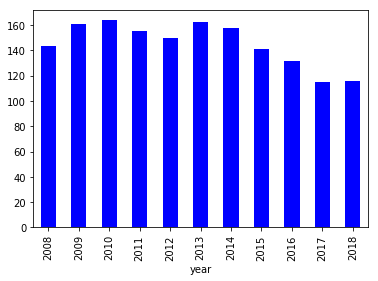

In [44]:
df_comb[df_comb.qc_name == 'Valid'].groupby('year')['aqi'].mean().plot(kind='bar', color='blue')
#df_comb[df_comb.qc_name == 'Valid'].groupby('year')['value'].median()

##### Winter months tend to be worse, with December highest

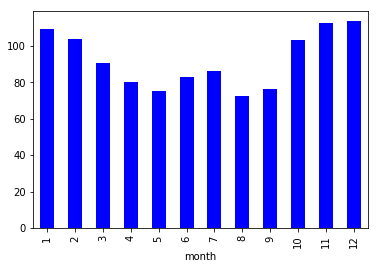

In [11]:
df_comb[df_comb.qc_name == 'Valid'].groupby('month')['value'].mean().plot(kind='bar', color='blue')

##### Pollution tends to be worse at night, as average levels start to rise starting between 4pm and 5pm and staying elevated until 5am or so

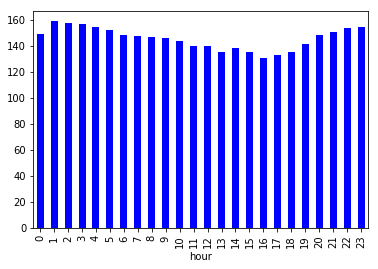

In [45]:
df_comb[df_comb.qc_name == 'Valid'].groupby('hour')['aqi'].mean().plot(kind='bar', color='blue')

In [46]:
df_comb.groupby(['qc_name','aqi']).size()
# how to treat valid values that are negative? just code as missing? so filter on 'value' < 0

qc_name  aqi 
Invalid  -999    3395
          4         1
          19        1
          20        3
          25        1
          27        1
          30        6
          31        1
          32        1
          33        3
          38        1
          40        5
          41        1
          42        1
          43        1
          44        1
          45        4
          46        1
          47        1
          48        4
          49        2
          50        3
          51        1
          52        7
          55        6
          57        1
          58        5
          59        3
          60        5
          63        5
                 ... 
Valid     567       1
          569       1
          570       1
          573       1
          574       1
          579       1
          583       1
          585       3
          587       1
          591       2
          592       1
          593       1
          595       1
          598     

In [51]:
def fill_missing(x):
    if x < 0:
        return None
    else:
        return x
    
a = fill_missing(-1)
print(a)

None


In [53]:
print('idk how to code :-(') # START HERE

idk how to code :-(


In [15]:
df_comb[df_comb.qc_name == 'Missing'].value.apply(fill_missing)
df_comb['val'] = df_comb.value.apply(fill_missing)
df_comb[df_comb.qc_name == 'Missing']
df_comb.iloc[694:700] #looks good

,site,parameter,dt,year,month,day,hour,value,duration,qc_name,unit,val
694,Beijing,PM2.5,2008-05-07 13:00,2008,5,7,13,-999,1 Hr,Missing,micrograms per sq meter,NaN
695,Beijing,PM2.5,2008-05-07 14:00,2008,5,7,14,-999,1 Hr,Missing,micrograms per sq meter,NaN
696,Beijing,PM2.5,2008-05-07 15:00,2008,5,7,15,80,1 Hr,Valid,micrograms per sq meter,80.0
697,Beijing,PM2.5,2008-05-07 16:00,2008,5,7,16,69,1 Hr,Valid,micrograms per sq meter,69.0
698,Beijing,PM2.5,2008-05-07 17:00,2008,5,7,17,66,1 Hr,Valid,micrograms per sq meter,66.0
699,Beijing,PM2.5,2008-05-07 18:00,2008,5,7,18,65,1 Hr,Valid,micrograms per sq meter,65.0


In [16]:
dates = [pd.to_datetime(d) for d in df_comb.dt]
dates[:5]

[Timestamp('2008-04-08 15:00:00'),
 Timestamp('2008-04-08 16:00:00'),
 Timestamp('2008-04-08 17:00:00'),
 Timestamp('2008-04-08 18:00:00'),
 Timestamp('2008-04-08 19:00:00')]

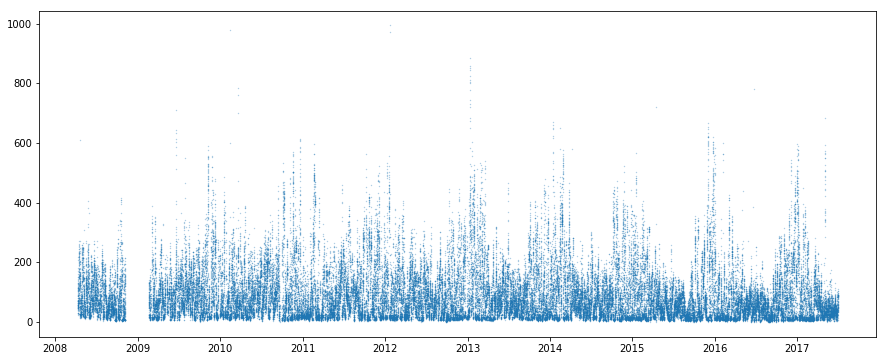

In [17]:
y = df_comb.val

plt.figure(figsize=(15,6))
plt.scatter(dates, y, alpha=0.5, s=.1)
plt.show()

##### Trying to recreate this graph produced by [Quartz](https://qz.com/197786/six-years-of-bejing-air-pollution-summed-up-in-one-scary-chart/)

![Graph from Quartz](https://github.com/yontartu/wuran/raw/master/img/quartz.png)

In [18]:
df_comb['dt'] = pd.to_datetime(df_comb.dt)
df_comb.head()

,site,parameter,dt,year,month,day,hour,value,duration,qc_name,unit,val
0,Beijing,PM2.5,2008-04-08 15:00:00,2008,4,8,15,207,1 Hr,Valid,micrograms per sq meter,207.0
1,Beijing,PM2.5,2008-04-08 16:00:00,2008,4,8,16,180,1 Hr,Valid,micrograms per sq meter,180.0
2,Beijing,PM2.5,2008-04-08 17:00:00,2008,4,8,17,152,1 Hr,Valid,micrograms per sq meter,152.0
3,Beijing,PM2.5,2008-04-08 18:00:00,2008,4,8,18,162,1 Hr,Valid,micrograms per sq meter,162.0
4,Beijing,PM2.5,2008-04-08 19:00:00,2008,4,8,19,171,1 Hr,Valid,micrograms per sq meter,171.0


In [19]:
m = pd.DataFrame({'max_pm25':df_comb.groupby(df_comb.dt.apply(lambda x: x.date()))['val'].max()}).reset_index()
print(m.shape)
m.tail()

(3316, 2)


,dt,max_pm25
3311,2017-06-26,43.0
3312,2017-06-27,101.0
3313,2017-06-28,104.0
3314,2017-06-29,110.0
3315,2017-06-30,90.0


Concentration (ug/m^3) to AQI conversion taken from [AQICN](http://aqicn.org/calculator)

![Screenshot from aqicn.org](https://github.com/yontartu/wuran/raw/master/img/aqicn.png)

In [20]:
#0		12		35.5		55.5		150.5		250.5		350.5		500.5
a = m[m.max_pm25 <= 12]
b = m[(m.max_pm25 > 12) & (m.max_pm25 <= 35.5)]
c = m[(m.max_pm25 > 35.5) & (m.max_pm25 <= 55.5)]
d = m[(m.max_pm25 > 55.5) & (m.max_pm25 <= 150.5)]
e = m[(m.max_pm25 > 150.5) & (m.max_pm25 <= 250.5)]
f = m[(m.max_pm25 > 250.5) & (m.max_pm25 <= 500.5)]
#f = m[(m.max_pm25 > 250.5) & (m.max_pm25 <= 350.5)]
#g = m[(m.max_pm25 > 350.5) & (m.max_pm25 <= 500.5)]

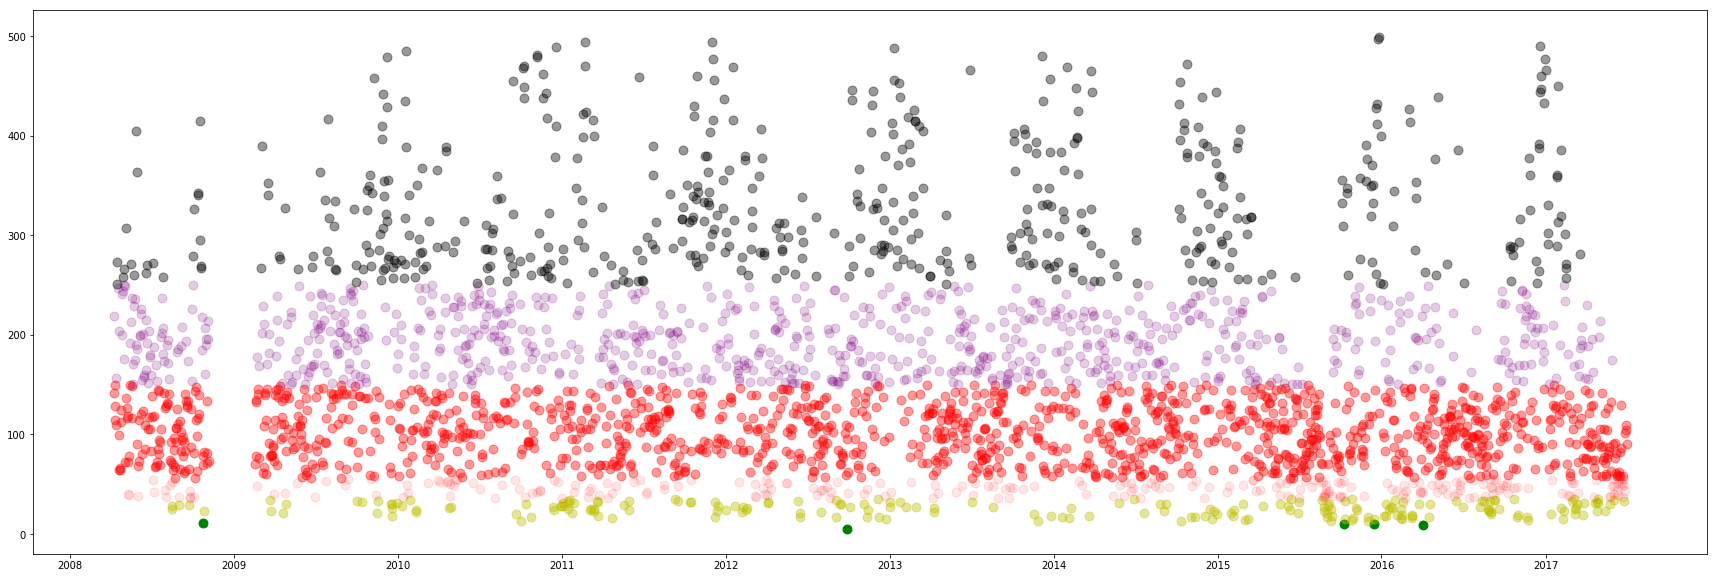

In [21]:
days = [pd.to_datetime(date) for date in m.dt]
days[:5]

plt.figure(figsize=(30,10))
plt.scatter(list(a.dt), a.max_pm25, alpha=1.0, s=80, c='g')
plt.scatter(list(b.dt), b.max_pm25, alpha=0.4, s=80, c='y')
plt.scatter(list(c.dt), c.max_pm25, alpha=0.1, s=80, c='r')
plt.scatter(list(d.dt), d.max_pm25, alpha=0.4, s=80, c='r')
plt.scatter(list(e.dt), e.max_pm25, alpha=0.2, s=80, c='purple')
plt.scatter(list(f.dt), f.max_pm25, alpha=0.4, s=80, c='black')
#plt.scatter(list(g.dt), g.max_pm25, alpha=0.4, s=80, c='black')
plt.show()

In [22]:
def gen_aqi_buckets(x):
    if x >= 0 and x <= 12:
        return "Good"
    elif x > 12 and x <= 35.5:
        return "Moderate"
    elif x > 35.5 and x <= 55.5:
        return "Unhealthy for Sensitive Groups"
    elif x > 55.5 and x <= 150.5:
        return "Unhealthy"
    elif x > 150.5 and x <= 250.5:
        return "Very Unhealthy"
    elif x > 250.5 and x <= 350.5:
        return "Hazardous"
    #elif x > 350.5 and x <= 500.5:
    #    return "Very Hazardous"
    elif x > 500.5:
        return "Literally off the charts"
    else:
        return "Not a valid AQI value"
    
a = gen_aqi_buckets(-1)
print(a)

Not a valid AQI value


In [23]:
m.head()
m.shape

m.max_pm25.apply(gen_aqi_buckets).head()
m['aqi_bucket'] = m.max_pm25.apply(gen_aqi_buckets)
m['year'] = pd.DatetimeIndex(m.dt).year
m['month'] = pd.DatetimeIndex(m.dt).month
c = m.groupby([m.year, m.aqi_bucket])['max_pm25'].count().unstack()
c[['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous','Literally off the charts']]

aqi_bucket,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,Literally off the charts
year,,,,,,,
2008,1.0,5.0,14.0,104.0,66.0,18.0,1.0
2009,NaN,13.0,10.0,121.0,94.0,42.0,8.0
2010,NaN,14.0,26.0,122.0,107.0,49.0,10.0
2011,NaN,27.0,19.0,141.0,83.0,54.0,4.0
2012,1.0,23.0,25.0,132.0,107.0,49.0,3.0
2013,NaN,12.0,19.0,147.0,103.0,43.0,12.0
2014,NaN,18.0,21.0,153.0,100.0,38.0,8.0
2015,2.0,33.0,38.0,171.0,64.0,31.0,9.0
2016,1.0,38.0,45.0,171.0,67.0,20.0,7.0


In [24]:
s = pd.DataFrame({'count':c.stack()}).reset_index()
s.head()

,year,aqi_bucket,count
0,2008,Good,1.0
1,2008,Hazardous,18.0
2,2008,Literally off the charts,1.0
3,2008,Moderate,5.0
4,2008,Not a valid AQI value,3.0


Is the number of **"Good"** and **"Moderate"** days increasing or decreasing? What about the number of **"Unhealthy"** and **"Hazardous"** days?

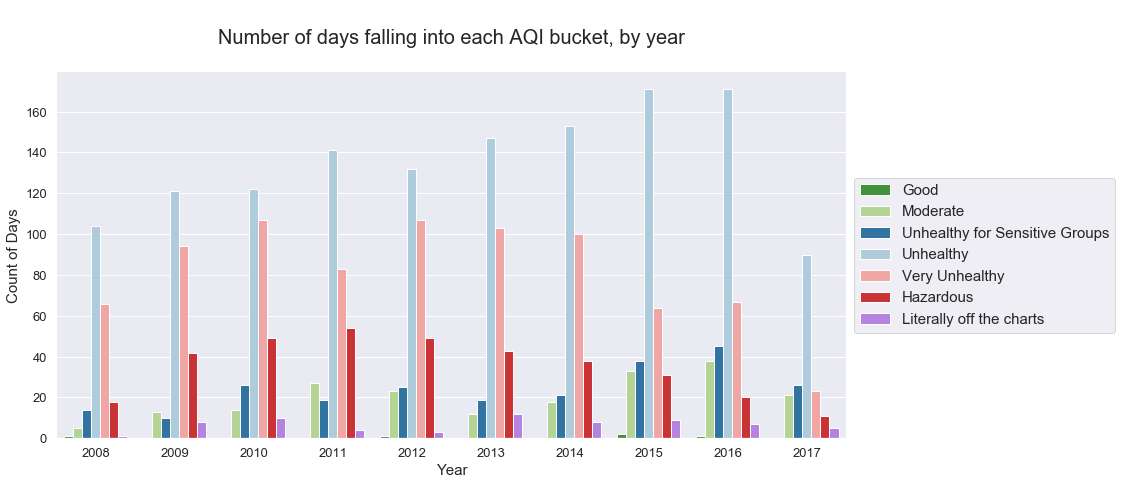

In [25]:
sns.set(style="darkgrid", color_codes=True)

p = sns.set_palette([
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.706, 0.459, 0.937)
])


f = sns.factorplot(x="year", y="count", hue="aqi_bucket", data=s, kind="bar", aspect=2, size=6
               , hue_order=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'
                            ,'Literally off the charts']
               , palette=p
               , legend=False
              )

plt.title('\nNumber of days falling into each AQI bucket, by year\n', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count of Days', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=15)
f.savefig(os.getcwd() + '/img/aqi_buckets.png')

You want to be comparing the greens and blues with the reds and purples over time. There are nearly *__zero__* "good" days across the time period, and also few "moderate" days. The number of "moderate" days have increased ever so slightly, as have "unhealthy for sensitive groups". Every year, a plurality of days are "unhealthy", likely due to the wide concentration range for this category (concentrations between 55.5 and 150.5 are considered "unhealthy"). "Very unhealthy" and "hazardous" days are on the decline.

Because data from 2008 and 2017 are imcomplete, disregard those (for now).

TO DO:
* Scale data by range distance?

In [26]:
days = [pd.to_datetime(date) for date in m.dt]
days[:5]

#plt.figure(figsize=(30,10))
#plt.scatter(list(a.dt), a.max_pm25, alpha=1.0, s=80, c='g')

[Timestamp('2008-04-08 00:00:00'),
 Timestamp('2008-04-09 00:00:00'),
 Timestamp('2008-04-10 00:00:00'),
 Timestamp('2008-04-11 00:00:00'),
 Timestamp('2008-04-12 00:00:00')]

In [27]:
m.head()

,dt,max_pm25,aqi_bucket,year,month
0,2008-04-08,219.0,Very Unhealthy,2008,4
1,2008-04-09,142.0,Unhealthy,2008,4
2,2008-04-10,150.0,Unhealthy,2008,4
3,2008-04-11,115.0,Unhealthy,2008,4
4,2008-04-12,129.0,Unhealthy,2008,4


TypeError: float() argument must be a string or a number, not 'datetime.date'

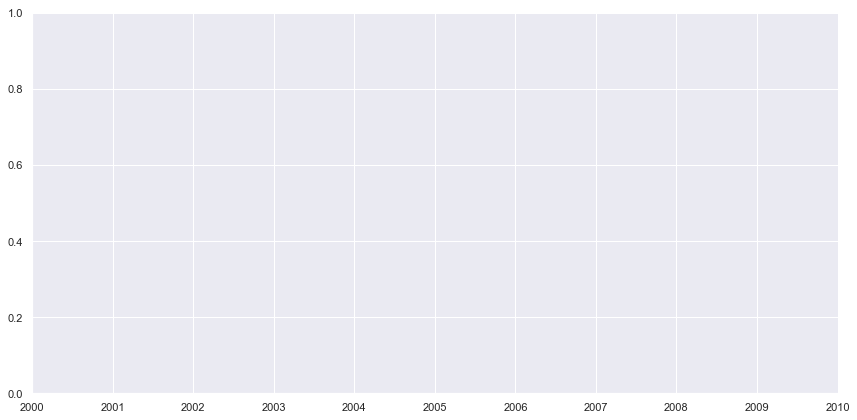

In [28]:
sns.set(style="darkgrid", color_codes=True)

p = sns.set_palette([
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.706, 0.459, 0.937)
])

f = sns.lmplot("dt", "max_pm25", hue="aqi_bucket", data=m, aspect=2, size=6)
#f = sns.scat(x="year", y="count", hue="aqi_bucket", data=s, kind="bar", aspect=2, size=6
#               , hue_order=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'
#                            ,'Literally off the charts']
#               , palette=p
#               , legend=False
#              )

plt.title('\nNumber of days falling into each AQI bucket, by year\n', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count of Days', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=15)

How about the *__share__* of each category of days?

In [29]:
c.sum(axis=1)

year
2008    212.0
2009    301.0
2010    351.0
2011    354.0
2012    355.0
2013    365.0
2014    365.0
2015    365.0
2016    366.0
2017    181.0
dtype: float64

# China Vitae data

In [2]:
filename = 'C:scrapy/chvitae/activity_20180320.json'
with open(filename, 'r') as f:
    cv = json.load(f)
print(len(cv)) # 15802 items
cv[0]

15802


{'date': 'March 18, 2018',
 'activity': '6th plenary meeting of 1st session of 13th NPC held in Beijing',
 'location': 'Beijing Municipality',
 'attendees': ['Shen Yueyue'],
 'source': 'XINHUA Online (English 2010)',
 'topics': ['domestic politics']}

In [3]:
i = 0
for record in cv:
    i += 1
    if any("foreign" in t for t in record['topics']):
        if len(record['attendees']) > 1:
            print(i)
            print('***Topics: ', record['topics'])
            print('***Attendees: ', record['attendees'])
            title = record['activity']
            attendees = record['attendees']
            date =  record['date']
            location = record['location']
            topics = record['topics']
            source = record['source']
    #print([t for t in record['topics'] if "foreign" in t])
    if i == 30:
        break

17
***Topics:  ['foreign relations']
***Attendees:  ['Song Tao', '\n\t\t\t\t\tBorge Brende']
22
***Topics:  ['foreign relations']
***Attendees:  ['Xi Jinping', '\n\t\t\t\t\tDenis Sassou Nguesso', '\n\t\t\t\t\tAntoinette Sassou Nguesso', '\n\t\t\t\t\tLiyuan Peng']
25
***Topics:  ['foreign relations']
***Attendees:  ['Ma Kai', '\n\t\t\t\t\tErnest Moniz']


In [4]:
#fp = dict()
fp = list()

i = -1
j = 0
for record in cv:
    i += 1
    new_rec = dict()
    if any("foreign" in t for t in record['topics']):
        if len(record['attendees']) > 1:
            #print(i)
            j += 1
            #print('***Topics: ', record['topics'])
            #print('***Attendees: ', record['attendees'])
            new_rec['title'] = record['activity']
            new_rec['attendees'] = record['attendees']
            new_rec['date'] =  record['date']
            new_rec['location'] = record['location']
            new_rec['tags'] = record['topics']
            new_rec['source'] = record['source']
            new_rec['id'] = j
            #new_rec['id'] = str('id_' + str(j))
            #fp['data'] = new_rec
            #fp[str('id_' + str(j))] = new_rec
            fp.append(new_rec)
            
len(fp) #4397
#fp

4397

In [5]:
fp[:5]#['attendees']

[{'title': 'Song Tao Meets with Norwegian Foreign Minister ',
  'attendees': ['Song Tao', '\n\t\t\t\t\tBorge Brende'],
  'date': 'April 10, 2017',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'International Department Central Committee of CPC',
  'id': 1},
 {'title': 'China to help Republic of Congo diversify economy',
  'attendees': ['Xi Jinping',
   '\n\t\t\t\t\tDenis Sassou Nguesso',
   '\n\t\t\t\t\tAntoinette Sassou Nguesso',
   '\n\t\t\t\t\tLiyuan Peng'],
  'date': 'July 05, 2016',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'XINHUA Online (China View)',
  'id': 2},
 {'title': 'China-U.S. nuclear security center goes online',
  'attendees': ['Ma Kai', '\n\t\t\t\t\tErnest Moniz'],
  'date': 'March 18, 2016',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'XINHUA Online (China View)',
  'id': 3},
 {'title': 'Li Keqiang Meets with Japanese Business Delegation',
  'attendee

In [6]:
i = 0
for item in fp:
    i += 1
    #if any("Xi Jinping" in a for a in item['attendees']):
    if any("Hu Jintao" in a for a in item['attendees']):
        print(item)
        print("\n")
    if i == 30:
        break

{'title': "Mutual support for each other's core interests important part of China-Russia ties: joint statement", 'attendees': ['Hu Jintao', '\n\t\t\t\t\tDmitry Medvedev'], 'date': 'September 28, 2010', 'location': 'Beijing Municipality', 'tags': ['foreign relations', 'government'], 'source': 'XINHUA Online (China View)', 'id': 24}


{'title': 'Hu Jintao met with British Prime Minister Gordon Brown. ', 'attendees': ['Hu Jintao', 'Tang Jiaxuan', '\n\t\t\t\t\tGordon Brown'], 'date': 'January 18, 2008', 'location': 'Beijing Municipality', 'tags': ['foreign relations'], 'source': 'XINHUA Online (China View)', 'id': 27}


{'title': 'Hu Jintao met with Prime Minister of Portugal Jose Socrates and EU Commission President Jose Manuel Durao Barroso.', 'attendees': ['Hu Jintao', '\n\t\t\t\t\tJose Socrates', '\n\t\t\t\t\tJose Manuel Barroso'], 'date': 'November 28, 2007', 'location': 'Beijing Municipality', 'tags': ['foreign relations'], 'source': "Central People's Government, PRC", 'id': 28}




In [7]:
huxi = list()

i = -1
j = 0
for record in cv:
    i += 1
    new_rec = dict()
    if any("foreign" in t for t in record['topics']):
        if len(record['attendees']) > 1:
            if any("Xi Jinping" in a for a in record['attendees']) or any("Hu Jintao" in a for a in record['attendees']):
                #print(i)
                j += 1
                #print('***Topics: ', record['topics'])
                #print('***Attendees: ', record['attendees'])
                new_rec['title'] = record['activity']
                new_rec['attendees'] = record['attendees']
                new_rec['date'] =  record['date']
                new_rec['location'] = record['location']
                new_rec['tags'] = record['topics']
                new_rec['source'] = record['source']
                new_rec['id'] = j
                #new_rec['id'] = str('id_' + str(j))
                #fp['data'] = new_rec
                #fp[str('id_' + str(j))] = new_rec
                huxi.append(new_rec)
            
len(huxi) #903

903

In [8]:
huxi[159]

{'title': 'Hu Jintao and Wu Bangguo met with Venezuelan President Hugo Chavez. ',
 'attendees': ['Hu Jintao',
  'Chen Kuiyuan',
  'Dai Bingguo',
  'Sun Zhengcai',
  'Uyunqimg ',
  'Wu Bangguo',
  '\n\t\t\t\t\tHugo Chavez'],
 'date': 'September 24, 2008',
 'location': 'Beijing Municipality',
 'tags': ['foreign relations'],
 'source': 'XINHUA Online (China View)',
 'id': 160}

In [9]:
# number of attendees > 1
# topics contains "foreign"
# activity contains a country name

# order dicts in fp by date

In [36]:
countries = pd.read_csv('c:data/countries_clean.csv')
countries.head()

,Unnamed: 0,num_code,alpha_2_code,alpha_3_code,en_short_name,nationality
0,0,4,AF,AFG,afghanistan,afghan
1,1,248,AX,ALA,åland islands,åland island
2,2,8,AL,ALB,albania,albanian
3,3,12,DZ,DZA,algeria,algerian
4,4,16,AS,ASM,american samoa,american samoan


In [37]:
ex = huxi[0]
ex['title'].lower()

'china to help republic of congo diversify economy'

In [38]:
co_list = countries.en_short_name.tolist()
co_list[:5]

['afghanistan', 'åland islands', 'albania', 'algeria', 'american samoa']

In [39]:
if any(co in ex['title'].lower() for co in co_list):
    print(co)

zimbabwe


In [ ]:
if any(ext in url_string for ext in extensionsToCheck):
    print(url_string)

In [41]:
if any('congo' in ex['title'].lower() for co in co_list):
    print(co)

zimbabwe


In [32]:
for co in co_list:
    if co in ex['title'].lower():
        print(co)

In [43]:
countries[countries.en_short_name.str.contains('republic')]

,Unnamed: 0,num_code,alpha_2_code,alpha_3_code,en_short_name,nationality
49,49,140,CF,CAF,central african republic,central african
57,57,178,CG,COG,republic of the congo,congolese
58,58,178,CG,COG,republic of congo,congolese
59,59,180,CD,COD,democratic republic of the congo,congolese
60,60,180,CD,COD,democratic republic of congo,congolese
69,69,203,CZ,CZE,czech republic,czech
73,73,214,DO,DOM,dominican republic,dominican
135,135,408,KP,PRK,democratic people's republic of korea,north korean
137,137,410,KR,KOR,republic of korea,south korean
144,144,418,LA,LAO,lao people's democratic republic,lao


In [30]:
cv = pd.read_json('/Users/Joey/Documents/yenching/projects/wuran/scrapy/chvitae/activity_20180320.json')
print('Shape: ', cv.shape)
cv.head()

Shape:  (15802, 6)


,activity,attendees,date,location,source,topics
0,6th plenary meeting of 1st session of 13th NPC...,[Shen Yueyue],2018-03-18,Beijing Municipality,XINHUA Online (English 2010),[domestic politics]
1,Highlights of foreign congratulatory messages ...,[Xi Jinping],2018-03-17,Beijing Municipality,XINHUA Online (English 2010),[domestic politics]
2,Wang Yang calls for improved quality of proposals,[Wang Yang],2018-03-16,Beijing Municipality,XINHUA Online (English 2010),[domestic politics]
3,Candidate list for China's new state leadershi...,[Li Zhanshu],2018-03-15,Beijing Municipality,XINHUA Online (English 2010),[domestic politics]
4,Top political advisor calls for concerted effo...,[Wang Yang],2018-03-15,Beijing Municipality,XINHUA Online (English 2010),[domestic politics]


In [43]:
cv.groupby(cv.source).size().sort_index()#.str.contains('foreign')

source
Beijing Olympics                                         9
CHINA DAILY (Government)                                 1
CPC PEOPLE (English)                                     3
CRI Online                                              32
Central People's Government, PRC                       495
China Daily                                              1
China Military Online                                  134
China News                                              12
Health                                                   1
International Department Central Committee of CPC      409
Ministry of Defense (English)                          247
Ministry of Foreign Affairs, PRC                       423
People's Daily Online                                  183
XINHUA Online (China View)                           10440
XINHUA Online (English 2010)                           293
business                                               146
china.com.cn                                     

## To Do
- Code up dates of Party Congresses, Olympics, and other events
- Convert concentrations to AQI
- Download data and perform exploratory analysis for Chengdu, Guangzhou, Shanghai and Shenyang 
- https://en.wikipedia.org/wiki/Air_quality_index#History_of_the_AQI
- TWITTER: gather missing data from 2017 via Twitter, and incorporate into analysis
- AIDDATA: merge with data on chinese investment in the developing world; is pollution lower for countries where china has large investments?
    - Or combine with WTO/World Bank trade data for that matter

## Random experimenting

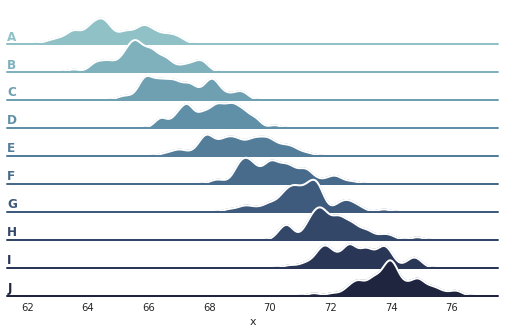

In [21]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500) #
g = np.tile(list("ABCDEFGHIJ"), 50) #
df = pd.DataFrame(dict(x=x, g=g)) #
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [22]:
d = df_comb[['year','val']]
d.tail()

,year,val
79554,2017,51.0
79555,2017,68.0
79556,2017,61.0
79557,2017,49.0
79558,2017,55.0


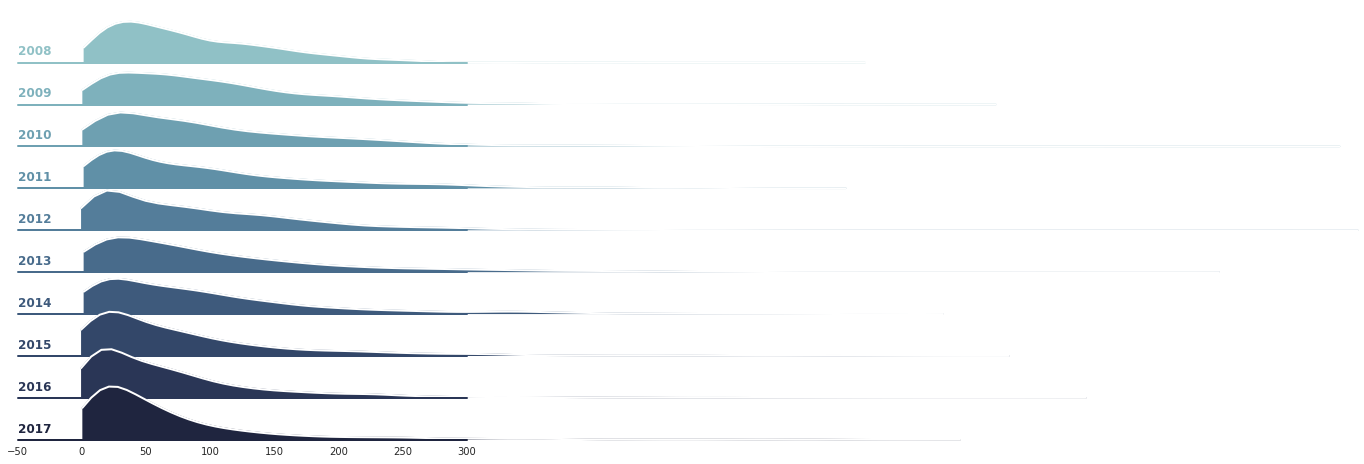

In [28]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(d, row="year", hue="year", aspect=10, size=.7, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "val", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "val", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "val")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
#g.set(xticks=[])
g.set_xlabels('')
g.set(xlim=[-50,300])
g.despine(bottom=True, left=True)